# Epidemics on networks: the SI model

In [1]:
import networkx as nx
import numpy as np

# There will be 4 parameters for the model:
# (graph) The networkx graph 
# (tmax) The maximum time that we will run the model 
# (beta) The transmission probability 
# (initial_inf) The initial fraction of infected nodes
def SI(graph, tmax, beta, initial_inf):
     inf_o = set(np.random.choice(graph.nodes(), size=int(len(graph) * initial_inf), replace=False))
     nx.set_node_attributes(graph, {node: ([1] if node in inf_o else [0]) for node in graph.nodes()},'inf')
    
     for t in range(tmax):
        for node in graph.nodes():
            if graph.node[node]['inf'][t] == 0:
                num_inf_neighbors = np.sum([ graph.node[neighbor]['inf'][t] for neighbor in graph.neighbors(node)])
                
                if np.random.random() < (1 - (1 - beta)**num_inf_neighbors):
                    graph.node[node]['inf'].append(1)
                else:
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
            else:
                graph.node[node]['inf'].append(graph.node[node]['inf'][t])
     return [ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)]


In [2]:
# Lets generate a random graph for testing
rnd_graph = nx.erdos_renyi_graph(100, 0.1)
rnd_graph = max(nx.connected_component_subgraphs(rnd_graph), key=len)

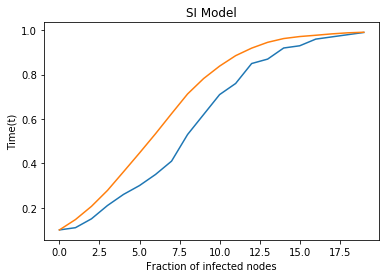

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Fraction of infected nodes')
plt.ylabel('Time(t)')
plt.title('SI Model')
plt.plot(SI(rnd_graph, tmax=20, beta=0.05, initial_inf=0.1))
plt.plot(np.mean([SI(rnd_graph, tmax=20, beta=0.05, initial_inf=0.1) for i in range(50)], axis=0) )

# Epidemics on networks: the SIS model

In [4]:
# Implementation of SIS model taking an additional input μ,a fixed rate infected individuals recover.
def SIS(graph, tmax, beta, initial_inf, mu):
     inf_o = set(np.random.choice(graph.nodes(), size=int(len(graph) * initial_inf), replace=False))
     nx.set_node_attributes(graph, {node: ([1] if node in inf_o else [0]) for node in graph.nodes()},'inf')
     
     for t in range(tmax):
        for node in graph.nodes():
            if graph.node[node]['inf'][t] == 0:
                num_inf_neighbors = np.sum([ graph.node[neighbor]['inf'][t] for neighbor in graph.neighbors(node)])
                difference = (((1 - beta)**num_inf_neighbors) - ((mu)**num_inf_neighbors))
                if np.random.random() < difference:
                    graph.node[node]['inf'].append(1)
                else:
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
            elif graph.node[node]['inf'][t] == 1:
                if np.random.random() < mu:
                    graph.node[node]['inf'].append(0)
                else:
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
     return [ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)]

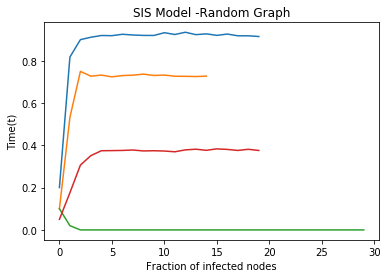

In [9]:
# Lets generate a random graph for testing
rnd_graph = nx.erdos_renyi_graph(100, 0.1)
rnd_graph = max(nx.connected_component_subgraphs(rnd_graph), key=len)

# Plots using various values of mu, beta, and initial_inf 
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Fraction of infected nodes')
plt.ylabel('Time(t)')
plt.title('SIS Model -Random Graph')
plt.plot(np.mean([SIS(rnd_graph, tmax=20, beta=0.05, initial_inf=0.2, mu=0.05) for i in range(50)], axis=0))
plt.plot(np.mean([SIS(rnd_graph, tmax=15, beta=0.05, initial_inf=0.1, mu=0.25) for i in range(50)], axis=0))

plt.plot(SIS(rnd_graph, tmax=30, beta=0.2, initial_inf=0.1, mu=0.9))
plt.plot(np.mean([SIS(rnd_graph, tmax=20, beta=0.5, initial_inf=0.05, mu=0.15) for i in range(50)], axis=0))



For a sufficiently high recovery rate the exponent in is negative. Therefore, fraction of nodes infected decreases exponentially with time, indicating that an initial infection will die out exponentially. This can be seen as a staright green line.

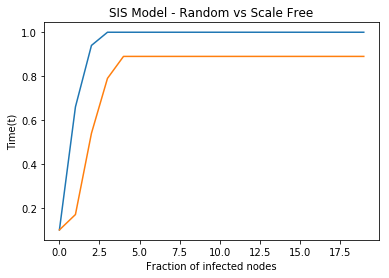

In [76]:
# Lets generate a random graph for testing
rnd_graph = nx.erdos_renyi_graph(100, 0.1)
rnd_graph = max(nx.connected_component_subgraphs(rnd_graph), key=len)
scale_free = nx.scale_free_graph(100,alpha=0.35, beta=0.60, gamma=0.05, delta_in=0.4, delta_out=0.4)

%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Fraction of infected nodes')
plt.ylabel('Time(t)')
plt.title('SIS Model - Random vs Scale Free')
plt.plot(SIS(rnd_graph, tmax=20, beta=0.05, initial_inf=0.1, mu=0.05))
plt.plot(SIS(scale_free, tmax=20, beta=0.05, initial_inf=0.1, mu=0.05))

The fraction of infected individuals in a scale-free network is lower than that of a random network.

# Simple the SIS model

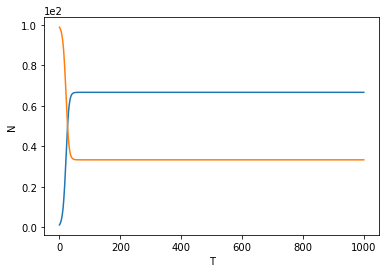

In [81]:
#Basic SIS model implementation with inputs
N = len(scale_free.nodes())
S = N - 1
I = 1
beta = 0.3
mu = 0.1

sus = []
inf = []

def infection(S, I, N):
    for t in range (0, 1000):
        S,I= S - (beta*S*I/N) + mu * I,I + (beta*S*I/N) - mu * I

        sus.append(S)
        inf.append(I)


infection(S, I, N)

figure = plt.figure()
figure.canvas.set_window_title('SIS model')

inf_line, =plt.plot(inf, label='I(t)')

sus_line, = plt.plot(sus, label='S(t)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('T')
plt.ylabel('N')

plt.show()

In [11]:
# Lets generate a random graph for testing
r_graph = nx.erdos_renyi_graph(300, 0.3)
r_graph = max(nx.connected_component_subgraphs(r_graph), key=len)
sc_free = nx.scale_free_graph(300,alpha=0.35, beta=0.60, gamma=0.05, delta_in=0.4, delta_out=0.4)


Name: 
Type: Graph
Number of nodes: 300
Number of edges: 13516
Average degree:  90.1067


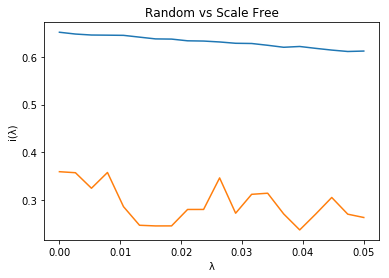

In [22]:
print(nx.info(r_graph))
m=0.5
plt.xlabel('λ')
plt.ylabel('i(λ)')
plt.title('Random vs Scale Free')
beta_list = np.linspace(0.0,0.05 * m,20)
plt.plot(beta_list/m,[np.mean([SIS(rnd_graph, tmax=100, beta=b, initial_inf=0.05,mu=m) for i in range(10)]) for b in beta_list])
plt.plot(beta_list/m,[np.mean([SIS(sc_free, tmax=100, beta=b, initial_inf=0.05,mu=m) for i in range(10)]) for b in beta_list])

##### 